In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan.csv")
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
461,LP002484,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,Y
207,LP001698,Male,No,0,Not Graduate,No,3975,2531.0,55.0,360.0,1.0,Rural,Y
218,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
431,LP002379,Male,No,0,Graduate,No,6500,0.0,105.0,360.0,0.0,Rural,N


**inference**
* Target cols is { Loan_Status }
* Loan_ID has no use Hence, will drop that cols 

In [3]:
df.shape

(614, 13)

**Inference**
* 614 rows & 13 features

In [4]:
### info 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Inference**
* Dtypes are proper assigned 
* Null values to be found in the dataset 

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Exploring Features 

In [6]:
## Gender

df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
## Married 

df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
## Education

df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [9]:
## Self_Employed

df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
## Credit_History

df["Credit_History"].unique()

array([ 1.,  0., nan])

In [11]:
## Property_Area

df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [12]:
## Loan_Status

df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [13]:
## Dependents

df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

## Handling null values

In [14]:
## null values 

df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

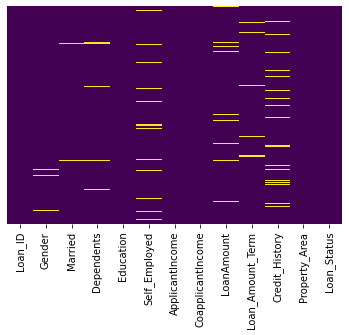

In [15]:
## graphical representation ( null values )  

sns.heatmap(df.isna(),cbar=False,cmap="viridis",yticklabels=False)

**Inference**
* null values to be found in **{ Gender, Married, Dependents, Self_Employed, Credit_History, LoanAmount, Loan_Amount_Term }**

In [16]:
# filling na with mode 

df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# filling na with mean 

df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

In [17]:
# checking weather values replaced??? 

df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

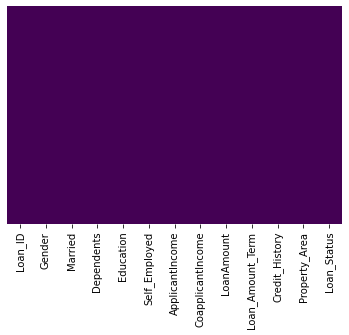

In [18]:
## graphical representation ( null values )  

sns.heatmap(df.isna(),cbar=False,cmap="viridis",yticklabels=False)

**Inference**
* **Gender, Married, Dependents, Self_Employed, Credit_History** replaced with **mode**
* **LoanAmount, Loan_Amount_Term** replaced with **mean**

## Encoding 

In [19]:
### Encoding using map func 

df["Gender"]=df["Gender"].map({'Male':0, 'Female':1})
df["Married"]=df["Married"].map({'No':0, 'Yes':1})
df["Dependents"]=df["Dependents"].map({'0':0, '1':1, '2':2, '3+':3})
df["Education"]=df["Education"].map({'Graduate':0, 'Not Graduate':1})
df["Self_Employed"]=df["Self_Employed"].map({'No':0, 'Yes':1})
df["Property_Area"]=df["Property_Area"].map({'Urban':0, 'Rural':1, 'Semiurban':2})
df["Loan_Status"]=df["Loan_Status"].map({'N':0, 'Y':1})

In [20]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0


## Feature Selection

In [21]:
### numeric representation

df.corr()['Loan_Status']

Gender              -0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
Credit_History       0.540556
Property_Area        0.103253
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

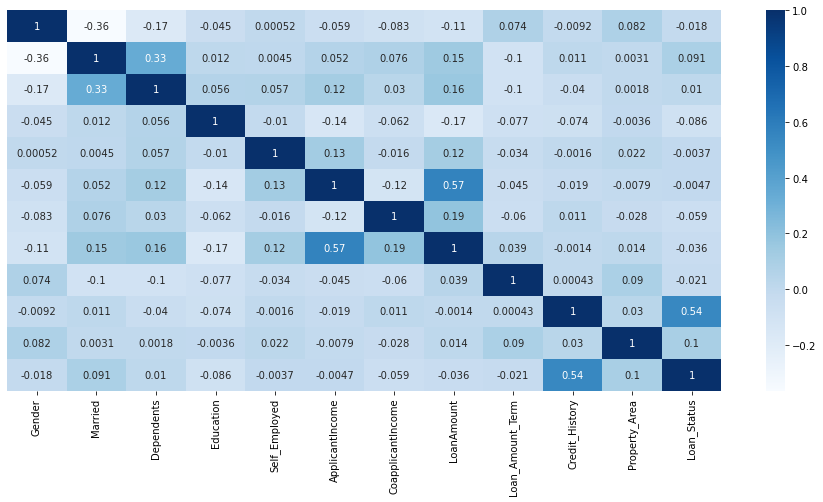

In [22]:
### graphical representation

plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),yticklabels=False,annot=True,cmap="Blues")
plt.show()

**Inference**
* **Highly correlated { Credit_History }**
* **Midly correlated { Married, Dependents, Property_Area }**
* **Negative correlated { Gender, Education, Self_Employed, ApplicationIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term }** 

In [23]:
## dropping cols 

df.drop("Loan_ID",inplace=True,axis=1)

In [24]:
## checking 

df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0


## Outliers 

In [25]:
### Descriptive Stats

df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.050489,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


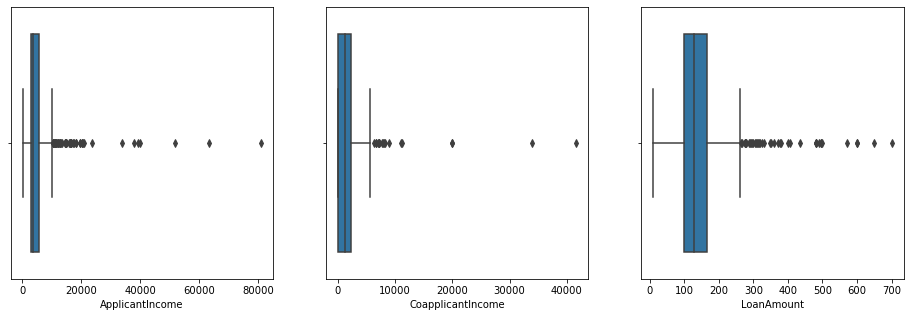

In [26]:
## graphical representation

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.boxplot(df["ApplicantIncome"])

plt.subplot(1,3,2)
sns.boxplot(df["CoapplicantIncome"])

plt.subplot(1,3,3)
sns.boxplot(df["LoanAmount"])
plt.show()

**Inference**
* Outliers to be found in the dataset for **{ ApplicantIncome, CoapplicantIncome, LoanAmount }**
* If I remove outliers the dataset is reduced to 33 rows Hence keeping the outliers 

## Insights 

In [27]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,1


<AxesSubplot:xlabel='Gender', ylabel='count'>

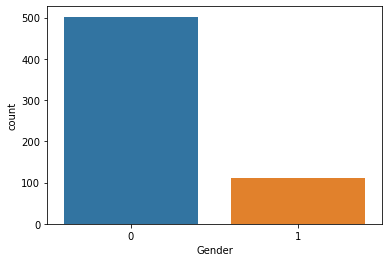

In [28]:
## Gender

sns.countplot(df["Gender"])

**Inference**
* Male count { 0 } in the dataset is higher than women count { 1 }

In [29]:
## Gender comparing 

pd.crosstab(df["Gender"],df["Loan_Status"])

Loan_Status,0,1
Gender,,
0,155,347
1,37,75


<AxesSubplot:xlabel='Gender', ylabel='count'>

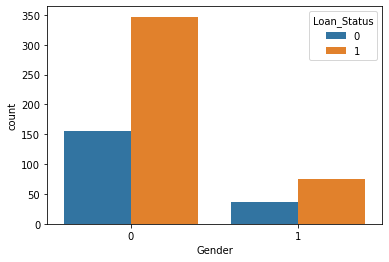

In [30]:
## crosstab visualization

sns.countplot(x=df["Gender"],hue=df["Loan_Status"])

**Inference**
* Here, Gender 0 is male , 1 is female & loan_status 0 is no & 1 is yes 
* We can see that male has the highest possibility getting a loan compared to women, **Note** data for women less 


<AxesSubplot:xlabel='Married', ylabel='count'>

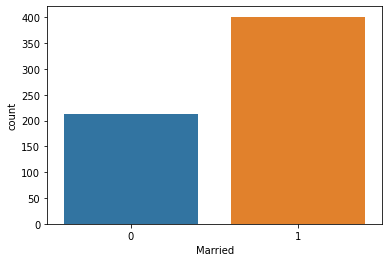

In [31]:
## Married

sns.countplot(df["Married"])

**Inference**
* Married are more than the unmarried people

In [32]:
## Married comparing 

pd.crosstab(df["Married"],df["Loan_Status"])

Loan_Status,0,1
Married,,
0,79,134
1,113,288


<AxesSubplot:xlabel='Married', ylabel='count'>

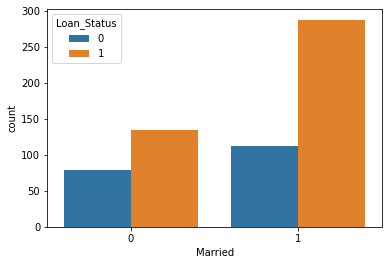

In [33]:
## crosstab visualization

sns.countplot(x=df["Married"],hue=df["Loan_Status"])

**Inference**
* Here, 0 is Unmarried , 1 is Married  & loan_status 0 is no & 1 is yes
* We can see that Married people has the highest possibility getting a loan compared to Unmarried

<AxesSubplot:xlabel='Dependents', ylabel='count'>

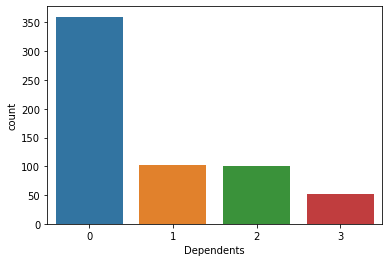

In [34]:
## Dependents

sns.countplot(df["Dependents"])

**Inference**
* 0 means no dependents and so on 
* Here, most of data is on no dependents

In [35]:
## Dependents comparing 

pd.crosstab(df["Dependents"],df["Loan_Status"])

Loan_Status,0,1
Dependents,,
0,113,247
1,36,66
2,25,76
3,18,33


<AxesSubplot:xlabel='Dependents', ylabel='count'>

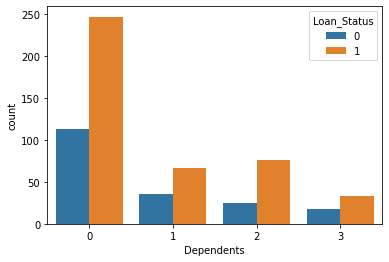

In [36]:
## crosstab visualization

sns.countplot(x=df["Dependents"],hue=df["Loan_Status"])

**Inference**
* No dependents has the Highest possibility of getting loan

<AxesSubplot:xlabel='Education', ylabel='count'>

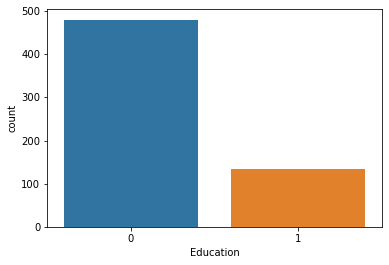

In [37]:
## Education

sns.countplot(df["Education"])

**Inference**
* Here, 0 are Graduate & 1 are Not Graduate 

In [38]:
## Education comparing 

pd.crosstab(df["Education"],df["Loan_Status"])

Loan_Status,0,1
Education,,
0,140,340
1,52,82


<AxesSubplot:xlabel='Education', ylabel='count'>

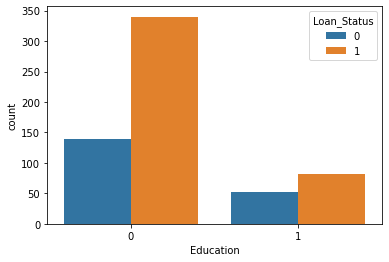

In [39]:
## crosstab visualization

sns.countplot(x=df["Education"],hue=df["Loan_Status"])

**Inference**
* Graduate has the highest possibility of getting a loan than UnGraduate **Note** Graduate data is more than UnGraduate

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

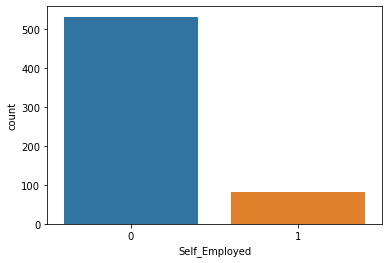

In [40]:
## Self_Employed

sns.countplot(df["Self_Employed"])

**Inference**
* Here, 0 are not self_employed & 1 are self_employed

In [41]:
## Self_Employed comparing 

pd.crosstab(df["Self_Employed"],df["Loan_Status"])

Loan_Status,0,1
Self_Employed,,
0,166,366
1,26,56


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

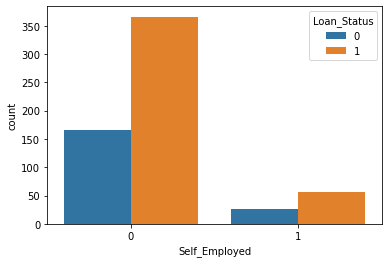

In [42]:
## crosstab visualization

sns.countplot(x=df["Self_Employed"],hue=df["Loan_Status"])

**Inference**
* Not self Employed people has highest possibility of laon sactions 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

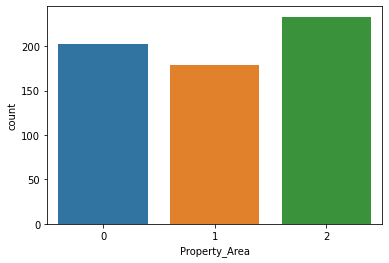

In [43]:
## Property_Area

sns.countplot(df["Property_Area"])

**Inference**
* Here, 0 are rural area, 1 are urban & 2 are semi-urban area 
* Most of the people from data stay in semi-urban area 

In [44]:
## Property_Area comparing 

pd.crosstab(df["Property_Area"],df["Loan_Status"])

Loan_Status,0,1
Property_Area,,
0,69,133
1,69,110
2,54,179


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

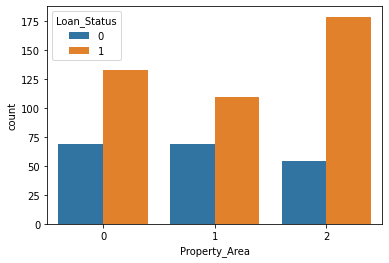

In [45]:
## crosstab visualization

sns.countplot(x=df["Property_Area"],hue=df["Loan_Status"])

**Inference**
* People from semi-urban area has the highest possibility getting loan sactions then comes rural and then urban

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

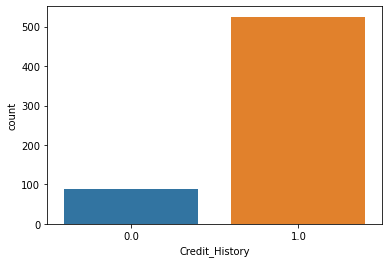

In [46]:
## Credit_History

sns.countplot(df["Credit_History"])

**Inference**
* Here, 1 credit history is good and 0 is not good  

In [47]:
## Credit_History comparing 

pd.crosstab(df["Credit_History"],df["Loan_Status"])

Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,110,415


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

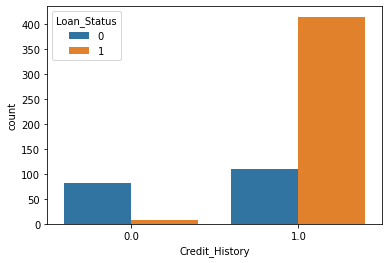

In [48]:
## crosstab visualization

sns.countplot(x=df["Credit_History"],hue=df["Loan_Status"])

**Inference**
* People with 1 credit history has the possible rate for loan sactions **Note** data for 0 credit history is less

## Standardization

In [49]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,0


In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df.iloc[:,:-1]=sc.fit_transform(df.iloc[:,:-1])

In [51]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.411733,-1.250298,1
1,-0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.411733,-0.060092,0
2,-0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.411733,-1.250298,1
3,-0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.411733,-1.250298,1
4,-0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.411733,-1.250298,1


## Model Building 

In [52]:
## model func 

def model(model_obj):
    model_obj.fit(xtrain,ytrain)
    ypred=model_obj.predict(xtest)
    print(classification_report(ytest,ypred))

In [53]:
### Separate x and y 

x=df.drop("Loan_Status",axis=1)
x.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.411733,-1.250298
1,-0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.411733,-0.060092


In [54]:
y=df["Loan_Status"]
y.head(2)

0    1
1    0
Name: Loan_Status, dtype: int64

In [55]:
### splitting the data

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.80,random_state=1)

In [56]:
### import model

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### report 

from sklearn.metrics import classification_report,accuracy_score

In [57]:
### initialising 

lr=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
dt=DecisionTreeClassifier()

### Logistic Regression

In [58]:
model(lr)

              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



### Knearest Neighbours

In [59]:
model(knn)

              precision    recall  f1-score   support

           0       0.74      0.44      0.55        39
           1       0.78      0.93      0.85        84

    accuracy                           0.77       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.77      0.77      0.75       123



### Support Vector Classifier

In [60]:
model(svc)

              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



### Decision Tree 

In [61]:
model(dt)

              precision    recall  f1-score   support

           0       0.51      0.62      0.56        39
           1       0.80      0.73      0.76        84

    accuracy                           0.69       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.71      0.69      0.70       123



**Inference**
* Logistic Regression and Svc has the highest accuracy at 80 % 
* where knn has 77 % & DecisionTree has 69 %

### Hypertunning

In [62]:
### import model

from sklearn.model_selection import GridSearchCV

In [63]:
## logistic Regression parameters 

lr_param={
    "penalty":["l1","l2"],
    "C":[0.01,0.05,0.1,0.5],
    "solver":['liblinear', 'sag']
}

In [64]:
### initializing 

cv=GridSearchCV(estimator=lr,param_grid=lr_param,cv=5,scoring="accuracy")

In [65]:
### fitting the model

cv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag']},
             scoring='accuracy')

In [66]:
ypred=cv.predict(xtest)

In [67]:
cv.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [68]:
cv.best_score_*100

81.47186147186147

**Inference**
* Before hypertuning accuracy was 80 % and  
* After hypertuning accuracy was 81 %

In [69]:
## Svc parameters 

svc_param={
    "kernel":['linear', 'rbf', 'sigmoid'],
    "C":[0.01,0.05,0.1,0.5]
}

In [70]:
### initializing 

cv=GridSearchCV(estimator=svc,param_grid=svc_param,cv=5,scoring="accuracy")

In [71]:
### fitting the model

cv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [72]:
ypred=cv.predict(xtest)

In [73]:
cv.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [74]:
cv.best_score_*100

81.06575963718822

**Inference**
* Before hypertuning accuracy was 80 % and
* After hypertuning accuracy was 81 %

In [75]:
## decision parameters

dt_param={
    "criterion":["gini","entropy"],
    "max_depth":[1,250],
    "min_samples_split":[2,250],
    "min_samples_leaf":[1,250]
}

In [76]:
### initializing 

cv=GridSearchCV(estimator=dt,param_grid=dt_param,cv=5,scoring="accuracy")

In [77]:
### fitting the model

cv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 250], 'min_samples_leaf': [1, 250],
                         'min_samples_split': [2, 250]},
             scoring='accuracy')

In [78]:
ypred=cv.predict(xtest)

In [79]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [80]:
cv.best_score_*100

81.06575963718822

**Inference**
* Before hypertuning accuracy was 69 % and
* After hypertuning accuracy was 81 %

**Final Model**

In [81]:
dt_final=DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 1,
                                    min_samples_leaf = 1,
                                    min_samples_split = 2)

In [82]:
dt_final.fit(xtrain,ytrain)
ypred=dt_final.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



**Inference**
* Selecting the Decision Tree Algorithm because,
* As Outliers cannot be removed from the dataset, it will reduced the data to 33 rows. Decision Tree has no affect of outliers 
* whereas, Svc will be best will multi classification but here the target variable is binary classification. Hence, dropping Svc alogrithm.

### Pickling 

In [83]:
import pickle

### pickling 

pickle.dump(lr , open("loan_santion.pkl" , "wb"))

### Flask

In [84]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.411733,-1.250298,1
1,-0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.411733,-0.060092,0


In [85]:
# Gender { 'Male' : 0, 'Female' : 1 }
# Married { 'No' : 0, 'Yes' : 1 }
# Dependents { '0' : 0, '1' : 1, '2' : 2, '3+' : 3}
# Education { 'Graduate' : 0, 'Not Graduate' : 1 }
# Self_Employed { 'No' : 0, 'Yes' : 1 }
# Loan_Amount_Term { 12 days - 480 days }
# Credit_History { 0 : 0, 1 : 1 }
# Property_Area { 'Urban' : 0, 'Rural' : 1, 'Semiurban' : 2}
# Loan_Status { 'N' : 0, 'Y' : 1 }